In [175]:
from landcover_dataloader import LandCoverDataset
import matplotlib.pyplot as plt
import seaborn as sns
import dataset_utils as utils
import csv

39076 m_3907638_se_18_1_20150815.tif 0.6835290127366015


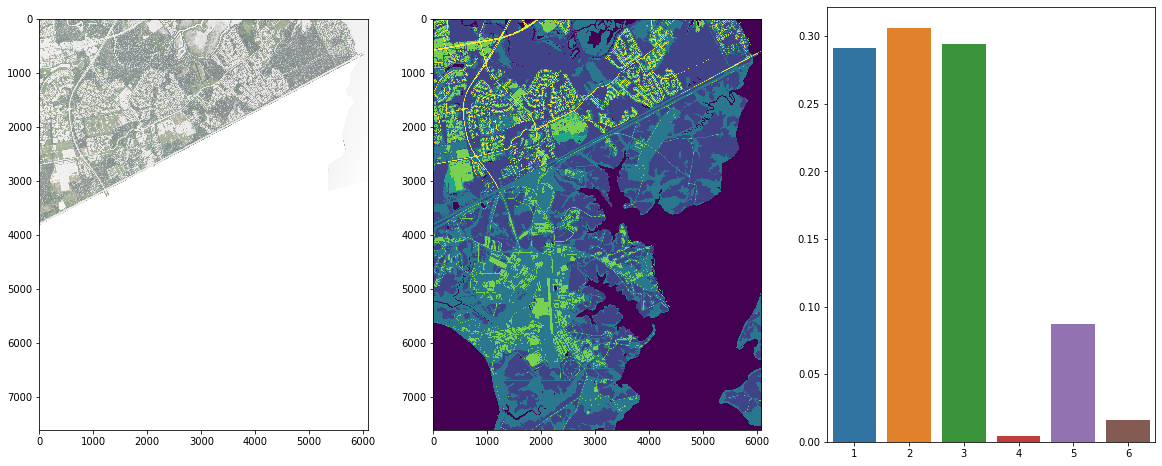

39076 m_3907638_nw_18_1_20150815.tif 0.0


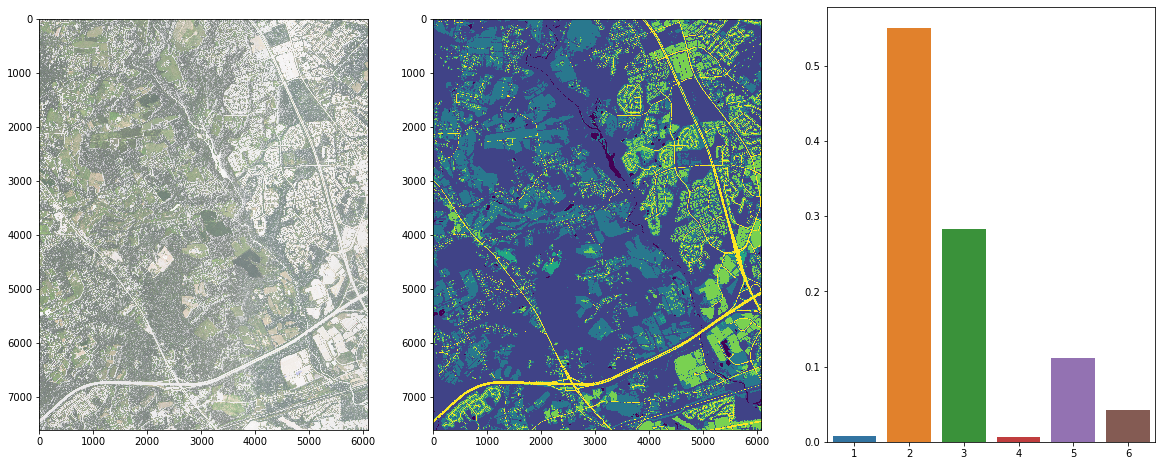

39076 m_3907639_se_18_1_20150815.tif 0.8482810557519724


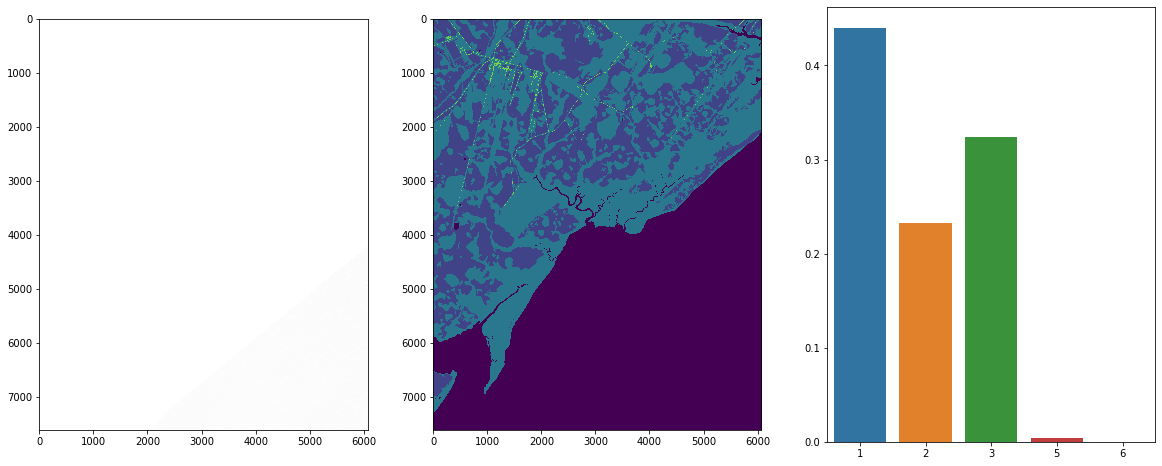

39076 m_3907639_sw_18_1_20150815.tif 0.8335051891978867


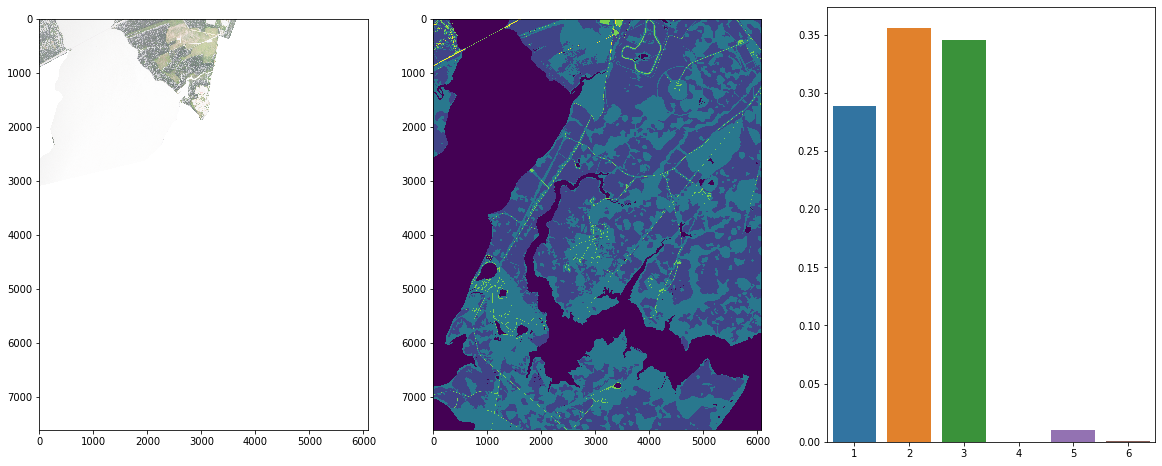

39076 m_3907640_nw_18_1_20150815.tif 0.6192457630049574


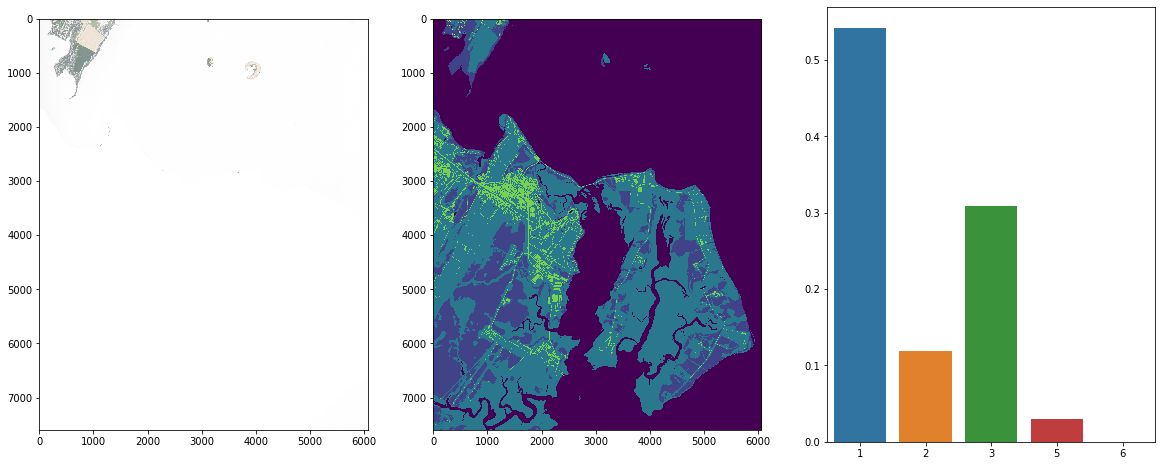

39076 m_3907638_sw_18_1_20150815.tif 0.1657848157490595


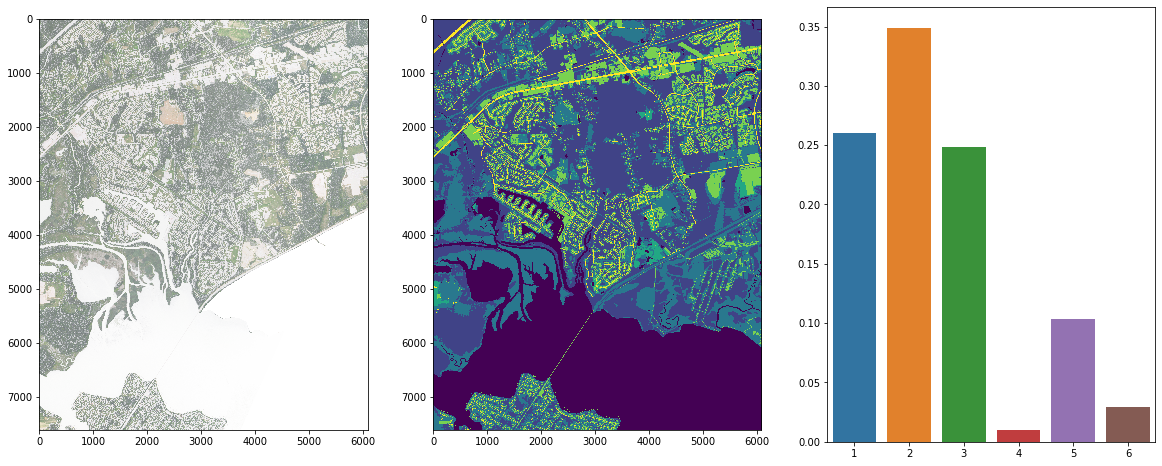

39076 m_3907639_ne_18_1_20150815.tif 0.8390783596235952


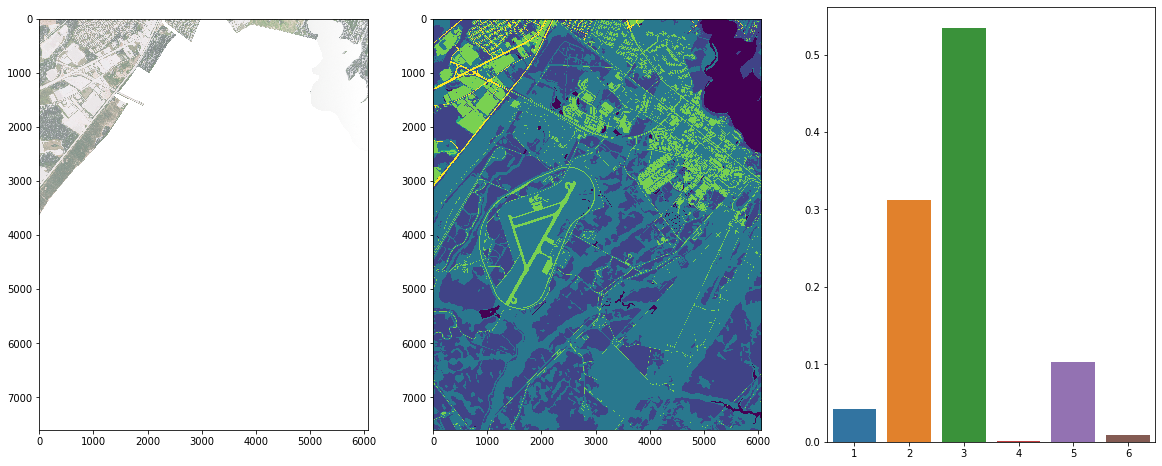

39076 m_3907646_nw_18_1_20150815.tif 0.5787160471790587


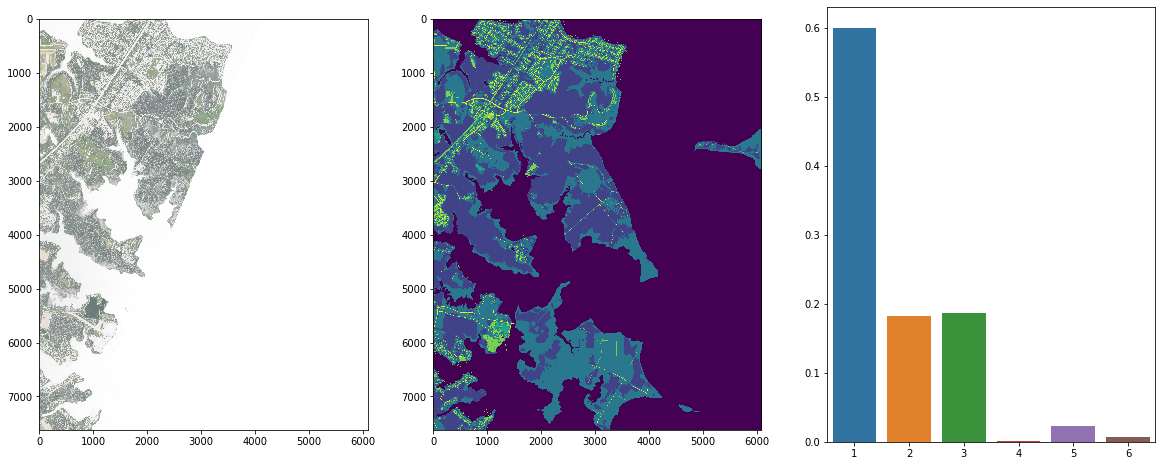

39076 m_3907647_nw_18_1_20150815.tif 0.7601791488000553


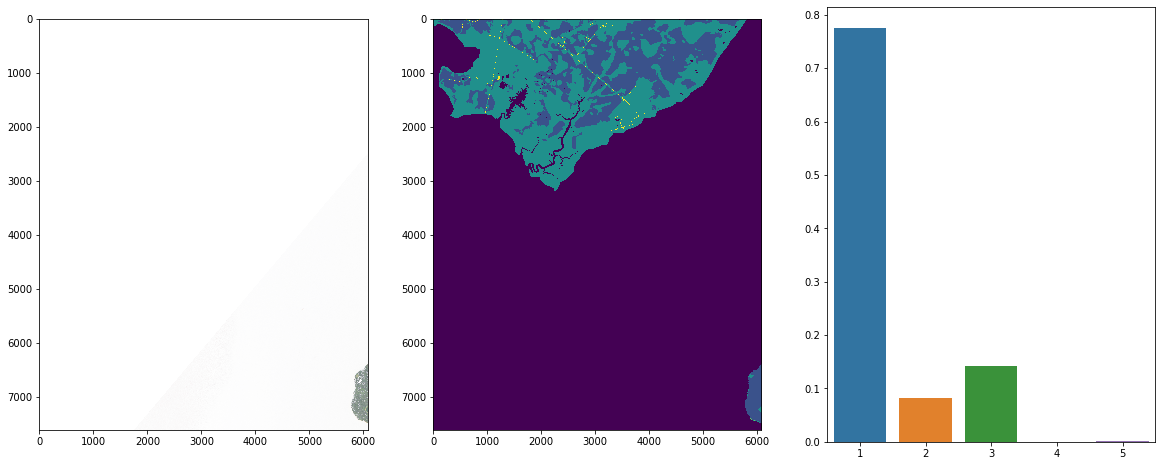

In [189]:
feature_dir_base = "/mnt/blobfuse/esri-naip/v002/md/2015/md_100cm_2015/"
label_dir_base = "/mnt/blobfuse/resampled-lc/data/v1/2015/states/md/md_1m_2015/"
block_data_path = "md_1m_2015.csv"
with open(block_data_path, "w") as f:
    writer = csv.writer(f)
    writer.writerow(["Feature Dir", feature_dir_base])
    writer.writerow(["Label Dir", label_dir_base])
    writer.writerow(["#"])
    writer.writerow(["block", "tile", "percent_zero_channels", "labels", "label_counts"])
    for block in os.listdir(feature_dir_base):
        tile_dir = os.path.join(feature_dir_base, block)
        label_tile_dir = os.path.join(label_dir_base, block)
        if os.path.isdir(tile_dir):
            for tile in os.listdir(tile_dir):
                if tile.endswith(".tif"):
                    if os.path.exists(label_dir + tile[:-4] + "_lc.tif"):
                        x = utils.read_tif_to_np(os.path.join(tile_dir, tile))
                        y = utils.read_tif_to_np(os.path.join(label_tile_dir, tile[:-4] + "_lc.tif"))
                        f, ax = plt.subplots(1, 3, figsize=(20, 8))
                        ax[0].imshow(np.moveaxis(x, [0], [2]))
                        labels = np.moveaxis(y, [0], [2])[:, :, 0]
                        ax[1].imshow(labels)
                        unique_labels, counts = np.unique(labels, return_counts=True)
                        sns.barplot(unique_labels, counts / np.sum(counts), ax=ax[2])
                        num_zero_channels = np.sum(np.sum(x == 0, axis=0) == 4)
                        percent_zero_channels = num_zero_channels / np.product(y.shape)
                        print(block, tile, percent_zero_channels)
                        plt.show()
                        writer.writerow([block, tile, percent_zero_channels, unique_labels, counts / np.sum(counts)])

In [192]:

feature_dir_base = "/mnt/blobfuse/esri-naip/data/v1/2015/states/md/md_1m_2015/"
label_dir_base = "/mnt/blobfuse/resampled-lc/data/v1/2015/states/md/md_1m_2015/"
block_data_path = "naip_v2_md_1m_2015.csv"
with open(block_data_path, "w") as f:
    writer = csv.writer(f)
    writer.writerow(["Feature Dir", feature_dir_base])
    writer.writerow(["Label Dir", label_dir_base])
    writer.writerow(["#"])
    writer.writerow(["block", "tile", "percent_zero_channels", "labels", "label_counts"])
    for block in os.listdir(feature_dir_base):
        tile_dir = os.path.join(feature_dir_base, block)
        label_tile_dir = os.path.join(label_dir_base, block)
        if os.path.isdir(tile_dir):
            for tile in os.listdir(tile_dir):
                if tile.endswith(".mrf"):
                    if os.path.exists(label_dir + tile[:-4] + "_lc.tif"):
                        x = utils.read_tif_to_np(os.path.join(tile_dir, tile))
                        y = utils.read_tif_to_np(os.path.join(label_tile_dir, tile[:-4] + "_lc.tif"))
                        f, ax = plt.subplots(1, 3, figsize=(20, 8))
                        ax[0].imshow(np.moveaxis(x, [0], [2]))
                        labels = np.moveaxis(y, [0], [2])[:, :, 0]
                        ax[1].imshow(labels)
                        unique_labels, counts = np.unique(labels, return_counts=True)
                        sns.barplot(unique_labels, counts / np.sum(counts), ax=ax[2])
                        num_zero_channels = np.sum(np.sum(x == 0, axis=0) == 4)
                        percent_zero_channels = num_zero_channels / np.product(y.shape)
                        print(block, tile, percent_zero_channels)
                        plt.show()
                        writer.writerow([block, tile, percent_zero_channels, unique_labels, counts / np.sum(counts)])

RasterioIOError: '/mnt/blobfuse/esri-naip/data/v1/2015/states/md/md_1m_2015/39076/m_3907638_nw_18_1_20150815.mrf' not recognized as a supported file format.